<img src="https://www.pycoa.fr/fig/logo-anime.gif" alt="Pycoa" width="125">

# Atelier logiciel Pycoa [ⓒpycoa.fr](http://pycoa.fr) 

Ce notebook a été présenté lors de l'atelier numérique du Colloque Francophone International sur l’Enseignement de la Statistique ([CFIES](https://cfies2022.sciencesconf.org/)) à Rennes, le 24 novembre 2022. Il s'agit d'une introduction à [Pycoa](http://pycoa.fr) beaucoup d'autres fonctionnalités ne sont pas présentées ici.



# 1. — Installation de [Pycoa](http://pycoa.fr)

## En ligne

Il est possible d'utiliser ce notebook en ligne, sans installation locale à l'aide de l'infrastructure [Binder](https://mybinder.org/). Pour cela, cliquer sur l'icône suivante : 


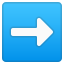

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/coa-project/pycoa/HEAD?labpath=coabook%2FPycoaCFIES2022.ipynb)

Suivant l'occupation des serveurs Binder le déploiement peut prendre entre 1 min et 5 min.

## Localement

Pour installer [Pycoa](http://pycoa.fr) sur son propre ordinateur, il faut suivre la procédure décrite sur le [wiki de Pycoa](https://github.com/coa-project/pycoa/wiki/Installation). 


# 2. — Utilisation de [Pycoa](http://pycoa.fr)

## A. — Importation de la librairie

Dans le code, il faut d'abord importer la librairie (_package_) dans l'environnement de développement.

In [1]:
import coaenv as pycoa

## B. — Séléction de la base de données

Plusieurs bases de données liées au Covid-19 sont exploitables. 

1. La première des instructions suivantes donne la liste des bases disponibles, avec leur nom, le code pays au format [ISO 3166-1 alpha 3](https://fr.wikipedia.org/wiki/ISO_3166-1#Table_de_codage) (ou ww pour world), le niveau de détail géographique (granularité), le pays ou les régions associées.

2. Pour l'exemple, la seconde instruction permet de séléctionner la principale base de données _française_, produite par Santé Publique France (la base de données s'appelle donc `spf`). 

In [2]:
pycoa.listwhom(True)

SPF aka Sante Publique France database selected (France departement granularity) ...
... Nine different databases from SPF will be parsed ...
Few information concernant the selected database :  spf
Available key-words, which ∈ ['tot_dchosp', 'cur_hosp', 'tot_rad', 'cur_rea', 'tot_vacc1', 'tot_vacc_complet', 'tot_vacc_rappel', 'tot_vacc2_rappel', 'cur_idx_tx_incid', 'cur_idx_R', 'cur_idx_tx_occupation_sae', 'cur_tx_pos', 'cur_idx_Prc_tests_PCR_TA_crible', 'cur_idx_Prc_susp_501Y_V1', 'cur_idx_Prc_susp_501Y_V2_3', 'cur_idx_Prc_susp_IND', 'cur_idx_Prc_susp_ABS', 'cur_nbre_pass_corona', 'cur_tx_A1', 'cur_tx_C1', 'cur_nb_A0', 'cur_nb_A1', 'cur_nb_C0', 'cur_nb_C1', 'tot_incid_hosp', 'tot_incid_rea', 'tot_incid_rad', 'tot_incid_dchosp', 'tot_P', 'tot_T']
Example of location :  Gard, Hautes-Alpes, Martinique, Haut-Rhin, Vendée  ...
Last date data  2022-12-16


In [ ]:
pycoa.setwhom('spf')

Santé Publique France diffuse les données afférentes à l'épidémie de Covid-19 en France. De manière regrettable, et contrairement aux autres bases de données, le format des données varie fréquemment et sans avertissement. Il arrive donc hélas que certaines commandes échouent, le temps d'apdater [Pycoa](http://pycoa.fr) aux dernières modifications.

## C. — Contenu des bases de données

La liste des _variables epidémiologiques_ disponibles pour la base de donnée sélectionnée est donnée par l'instruction suivante : 

In [ ]:
pycoa.listwhich()

La liste des _zones géographiques_ accessibles dans la base de donnée sélectionnée est quant à elle donnée par l'instruction suivante : 

In [ ]:
pycoa.listwhere() 

Différents mots-clés permettent de récupérer des informations spécifiques de la base de donnée : 

- `which`: _variables epidémiologiques_ d'intérêt (donnée sélectionnée)
- `where`: sélection de la (ou les) zone(s) géographique(s) :
   - pays, `list` de pays, région, continent…
   - département, `list` de départements, régions…
- `what`: dans le cas d'une série temporelle :
   - `'cumul'` dans le cas où on veut voir la somme de tout ce qu'il s'est passé
   - `'daily'` pour les valeurs journalières
   - `'weekly'` pour les valeurs hebdomadaires
- `when`: fenêtre de dates pour la donnée sélectionnée
- `option`: 
   - `'nonneg'` : lisse les données pour éviter les valeurs négatives (corrections a posteriori)
   - `'nofillnan'` : par défaut les données cumulées qui n'ont pas de valeurs ("Not a Number" ou Nan) sont remplacées par les valeurs du jour précedent, `'nofillnan'` supprime ce remplissage
   - `'smooth7'` : lisse les données sur 7 jours pour faire disparaître les fluctuations liées par exemple aux weekends
   - `'sumall'` : somme toutes les valeurs présentes


## D. — Instructions de Pycoa

Pycoa permet à la fois d'importer les données d'une base de donnnée publique, mais également de les représenter et de les récupérer pour les exporter Les instructions suivantes

- `pycoa.plot` : pour représenter la donnée sélectionnée en fonction du temps (série temporelle)
- `pycoa.map` : pour une représentation sous forme de carte
- `pycoa.hist` : pour les histogrammes, avec pour option :
  - `typeofhist='bycountry'` (par défaut), pour un histogramme à barres horizontales, lieu par lieu
  - `typeofhist='byvalue'`, pour un histogramme à barres verticales, par valeurs
  - `typeofhist='pie'`, pour un "camembert"
- `pycoa.get` : pour récupérer les données, en vue d'un traitement ultérieur.

# 3. — Exemples

## A. — Évolution temporelle

In [ ]:
pycoa.plot(which='cur_rea', typeofplot='menulocation')

In [ ]:
pycoa.plot(which='tot_vacc_complet', where='Bretagne')

In [ ]:
pycoa.plot(which='tot_vacc_complet', where='Paris', what='daily')

In [ ]:
pycoa.plot(which='tot_vacc_complet', where='Paris', what='daily', option='smooth7')

In [ ]:
pycoa.plot(where='Île-de-France', option='sumall')

## B. — Cartes

Les cartes, tout comme les graphes cartésiens précédents, sont interactives.

In [ ]:
pycoa.map(where=['Métropole'],which='tot_dchosp')

## C. — Histogrammes

In [ ]:
pycoa.hist(where='Ile-de-France', which='tot_vacc_complet')

In [ ]:
pycoa.hist(where='Bretagne' ,which='tot_vacc_complet', typeofhist='pie')

## D. — Récupération de données

Il est possible de récupérer les données dans un Pandas DataFrame, structure de données similaire à un tableau Excel, géré par la bibliothèsque `pandas`.

In [ ]:
mydf= pycoa.get(where='European Union', which='total_people_vaccinated_per_hundred')
display(mydf)

## E. — Travailler sur une autre base de données

Pour cet exemple, nous utilisons les données de [OWID](https://ourworldindata.org/coronavirus), certainement la base de données la plus complète sur le Covid-19. A priori les données concernant le nombre de cas et de décès sont identiques à celles affichées par la Johns Hopkins University, l'une des première institutions à suivre l'épidémie [JHU](https://coronavirus.jhu.edu/map.html).

### Chargement de la base de données

In [ ]:
pycoa.setwhom('owid')

### Représentation géographique du nombre de décès dus au Covid-19

Par défaut, les données épidémiologiques chargées sont 1er item de la base, ici ``total_deaths'` soit le nombre total de morts. La fonction `pycoa.map` représente la carte des zones géographiques liées à la base, ici l'ensemble des pays du monde.

L'option `visu='folium'` modifie à la marge la carte.

In [ ]:
pycoa.map()

In [ ]:
pycoa.map(visu='folium')

### Histogramme du nombre de personnes vaccinnées pour 100 habitants

Il est possible de choisir un sous-ensemble des pays du monde en précisant le mot clé `where` ; ici on choisit les pays du G20. D'autres options analogues sont possibles, qu'on peut récupérer comme précédemment expliqué à l'aide de la fonction `pycoa.listwhere()`.

In [ ]:
pycoa.hist(which='total_people_vaccinated_per_hundred', where='G20')

# 4. —  Documentation

Une documentation plus complète des instructions et options de Pycoa se trouve sur le [wiki Pycoa](https://github.com/coa-project/pycoa/wiki/Accueil). En particulier consultez le menu affiché en bas à droite : 
* [Récupération des données et traitements](https://github.com/coa-project/pycoa/wiki/Donn%C3%A9es%2Ctraitements)
* [Graphiques en courbes](https://github.com/coa-project/pycoa/wiki/Courbes)
* [Histogrammes, secteurs et cartes](https://github.com/coa-project/pycoa/wiki/Diagrammes%2CCartes)
* [Avancé](https://github.com/coa-project/pycoa/wiki/Avance)
* [Études de cas](https://github.com/coa-project/pycoa/wiki/Etudes%2Cde%2Ccas)
 
Les auteurs du logiciel sont disponibles pour vous aider : 
* suivez-nous sur Twitter [@pycoa_fr](https://twitter.com/pycoa_fr),
* ou écrivez-nous à support@pycoa.fr !